In [1]:
from test_packs import Lattice

In [2]:
lattice = Lattice(bounds = [100, 100, 100], radius = 8, clearance = 0.1)


In [3]:
lattice.x_coords

array([ 0, 16, 32, 48, 64, 80, 96])

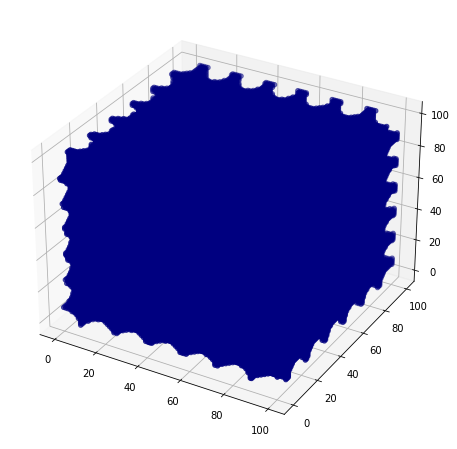

In [4]:
lattice('plot')

In [5]:
import numpy as np
s = 100//3
a_lin = np.arange(0, 100, s)
print(a_lin)

[ 0 33 66 99]


# Plots the pre-processed input files

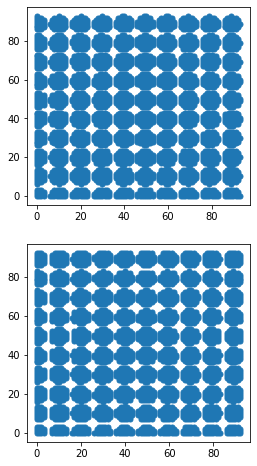

In [6]:
import pandas as pd
import numpy as np
import matplotlib
from os import path, getcwd, listdir
import matplotlib.pyplot as plt
from natsort import natsorted
%matplotlib inline

files = natsorted([_file for _file in listdir(path.join(getcwd(), 'OutPuts'))], key=lambda y: y.lower())

fig, axs = plt.subplots(2,1, figsize =(4,8))
axs = axs.ravel()
for count, file in enumerate(files[:2]):
    image = pd.read_csv(path.join('./OutPuts', file), sep = ' ', header=0)
    axs[count].plot(image.iloc[:,0], image.iloc[:,1], '.', ms = 10)



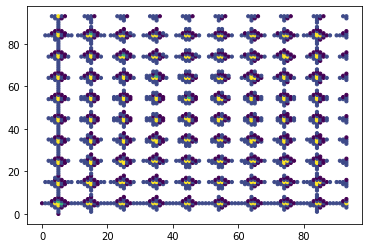

In [3]:
# plot a ball group
import pandas as pd
import numpy as np
import matplotlib
from os import path
import matplotlib.pyplot as plt
%matplotlib inline

file = '/Users/hamedhaddadi/Documents/Projects/PoreQuant/poreanalysis/utils/OutPuts/Pore_Analytics_Outputs/maxball_1.csv'
max_ball = pd.read_csv(file, header=0, sep=',')

fig, axs = plt.subplots()
axs.scatter(max_ball['x'], max_ball['y'], c = max_ball['radius'], s=10)


## testing reading and writing images and image stacks

In [151]:
from PIL import Image, ImageFilter
from PIL.ImageFilter import (SMOOTH)
import numpy as np
import matplotlib.pyplot as plt
from os import path, listdir
from natsort import natsorted
%matplotlib inline 

In [152]:
file_path = '/Users/hamedhaddadi/Documents/Projects/PoreQuant/pore_images/MapGels/T40-255'
stack_name = 'Stack.tif'
stack = Image.open(path.join(file_path,stack_name))
shape = np.shape(stack)
print(shape)
print(stack.n_frames)

(512, 512, 3)
128


In [49]:
stack_array = np.zeros((shape[0], shape[1], stack.n_frames))
for frame in range(stack.n_frames):
    stack.seek(frame)
    stack.filter(ImageFilter.MaxFilter(5))
    r,_,_ = stack.split()
    stack_array[:,:,frame] = np.array(r) 

index = np.where(stack_array > 0)
stack_array[index] = 1
    

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [1. 0. 0. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


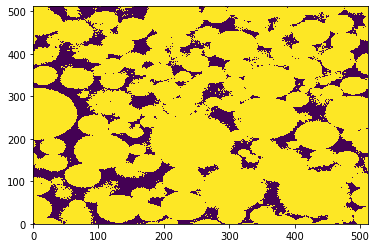

In [51]:
fig, axs = plt.subplots()
axs.pcolor(stack_array[:,:,60])
print(stack_array[:,:,60])

## reading a collection of individual image files

In [52]:
from PIL import Image 
from os import path, listdir
from natsort import natsorted 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [53]:
file_path = '/Users/hamedhaddadi/Documents/Projects/PoreQuant/pore_images/MapGels/T40-255'

In [65]:
files = natsorted([_file for _file in listdir(file_path) if 'z' in _file], key = lambda y: y.lower())

In [145]:
image_array = []
for _file in files:
    image = Image.open(path.join(file_path, _file))
    r,_,_ = image.split()
    image_array.append(np.array(r))

image_array = np.array(image_array)
index = np.where(image_array > 0)
image_array[index] = 1

w, h, s = image_array.shape

In [146]:
image_array = np.swapaxes(image_array, 0, 2)
print(image_array.shape)
w, h, s = image_array.shape
test_slice = (slice(0, w), slice(0, h), slice(0, 1))
slice_array = image_array[test_slice]
print(slice_array.shape)

(512, 512, 128)
(512, 512, 1)


In [147]:
slice_array = np.squeeze(slice_array)


In [148]:
print(slice_array.shape)

(512, 512)


In [144]:
index = np.where(slice_array > 0)
print(slice_array[index].shape)


(170556,)


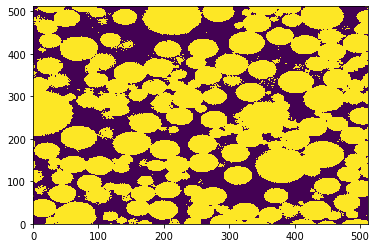

In [69]:
fig, axs = plt.subplots()
axs.pcolor(image_array[0,:,:])

In [64]:
img = Image.open(path.join(file_path, files[0]))
shape = np.shape(img)
print(shape)

(512, 512, 3)


In [62]:
r,_,_ = img.split()
r = np.array(r)

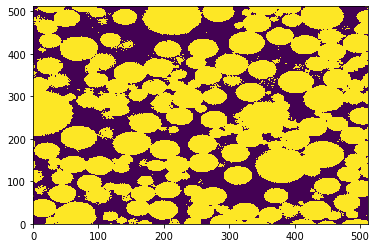

In [63]:
fig, axs = plt.subplots()
axs.pcolor(r)

In [70]:
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## testing the ImageReader from image.py

In [1]:
from image import ImageReader

In [2]:
file_path = '/Users/hamedhaddadi/Documents/Projects/PoreQuant/pore_images/MapGels/T40-255'
file_name = 'Stack.tif'
reader = ImageReader.from_image_stack(stack_name = file_name, stack_path = file_path)

In [3]:
print(reader.stack_array.shape)

(512, 512, 128)


In [4]:
reader.trim_images(direction = 'plane', min = 128, max = 256)

In [5]:
reader.slice_to_csv()